# Data Visualization

Select a dataset we have used in class (or outside of class).

Generate a plot that you feel visualizes the data is an interesting way. Your plot should have the following elements:

>1) Title
>2) Legend
>3) Axes or other Labels
>4) Color
>5) 1 sentence description of what your plot shows
>6) Brief description of why you chose to make the plot the way you did.

You may use pandas, matplotlib, or seaborn.

Upload a pdf of the plot to Canvas.

In [2]:
import pandas as pd
import numpy as np
import glob 
import matplotlib as plt
import geopandas as gp
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
df = pd.read_csv("workplaceinjuries.csv", encoding='cp1252') 

/tmp/ipykernel_688/1164035202.py:8: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("workplaceinjuries.csv", encoding='cp1252')


In [3]:
hosAmp = df[["Hospitalized","Amputation","Part of Body Title","EventTitle","Employer","State","City"]]
hosAmp["Hospitalized"].astype(int)
hosAmp = hosAmp[(hosAmp["Amputation"]>0)]

# ampNotHos = hosAmp[(hosAmp['Amputation']>0 & (hosAmp['Hospitalized']<=0))]
ampNotHos = hosAmp[(hosAmp['Hospitalized']<=0)]

,Amputation
State,
TEXAS,2797.0
OHIO,1816.0
PENNSYLVANIA,1377.0
ILLINOIS,1202.0
GEORGIA,1188.0
FLORIDA,1157.0
WISCONSIN,1019.0
NEW YORK,814.0
ALABAMA,695.0


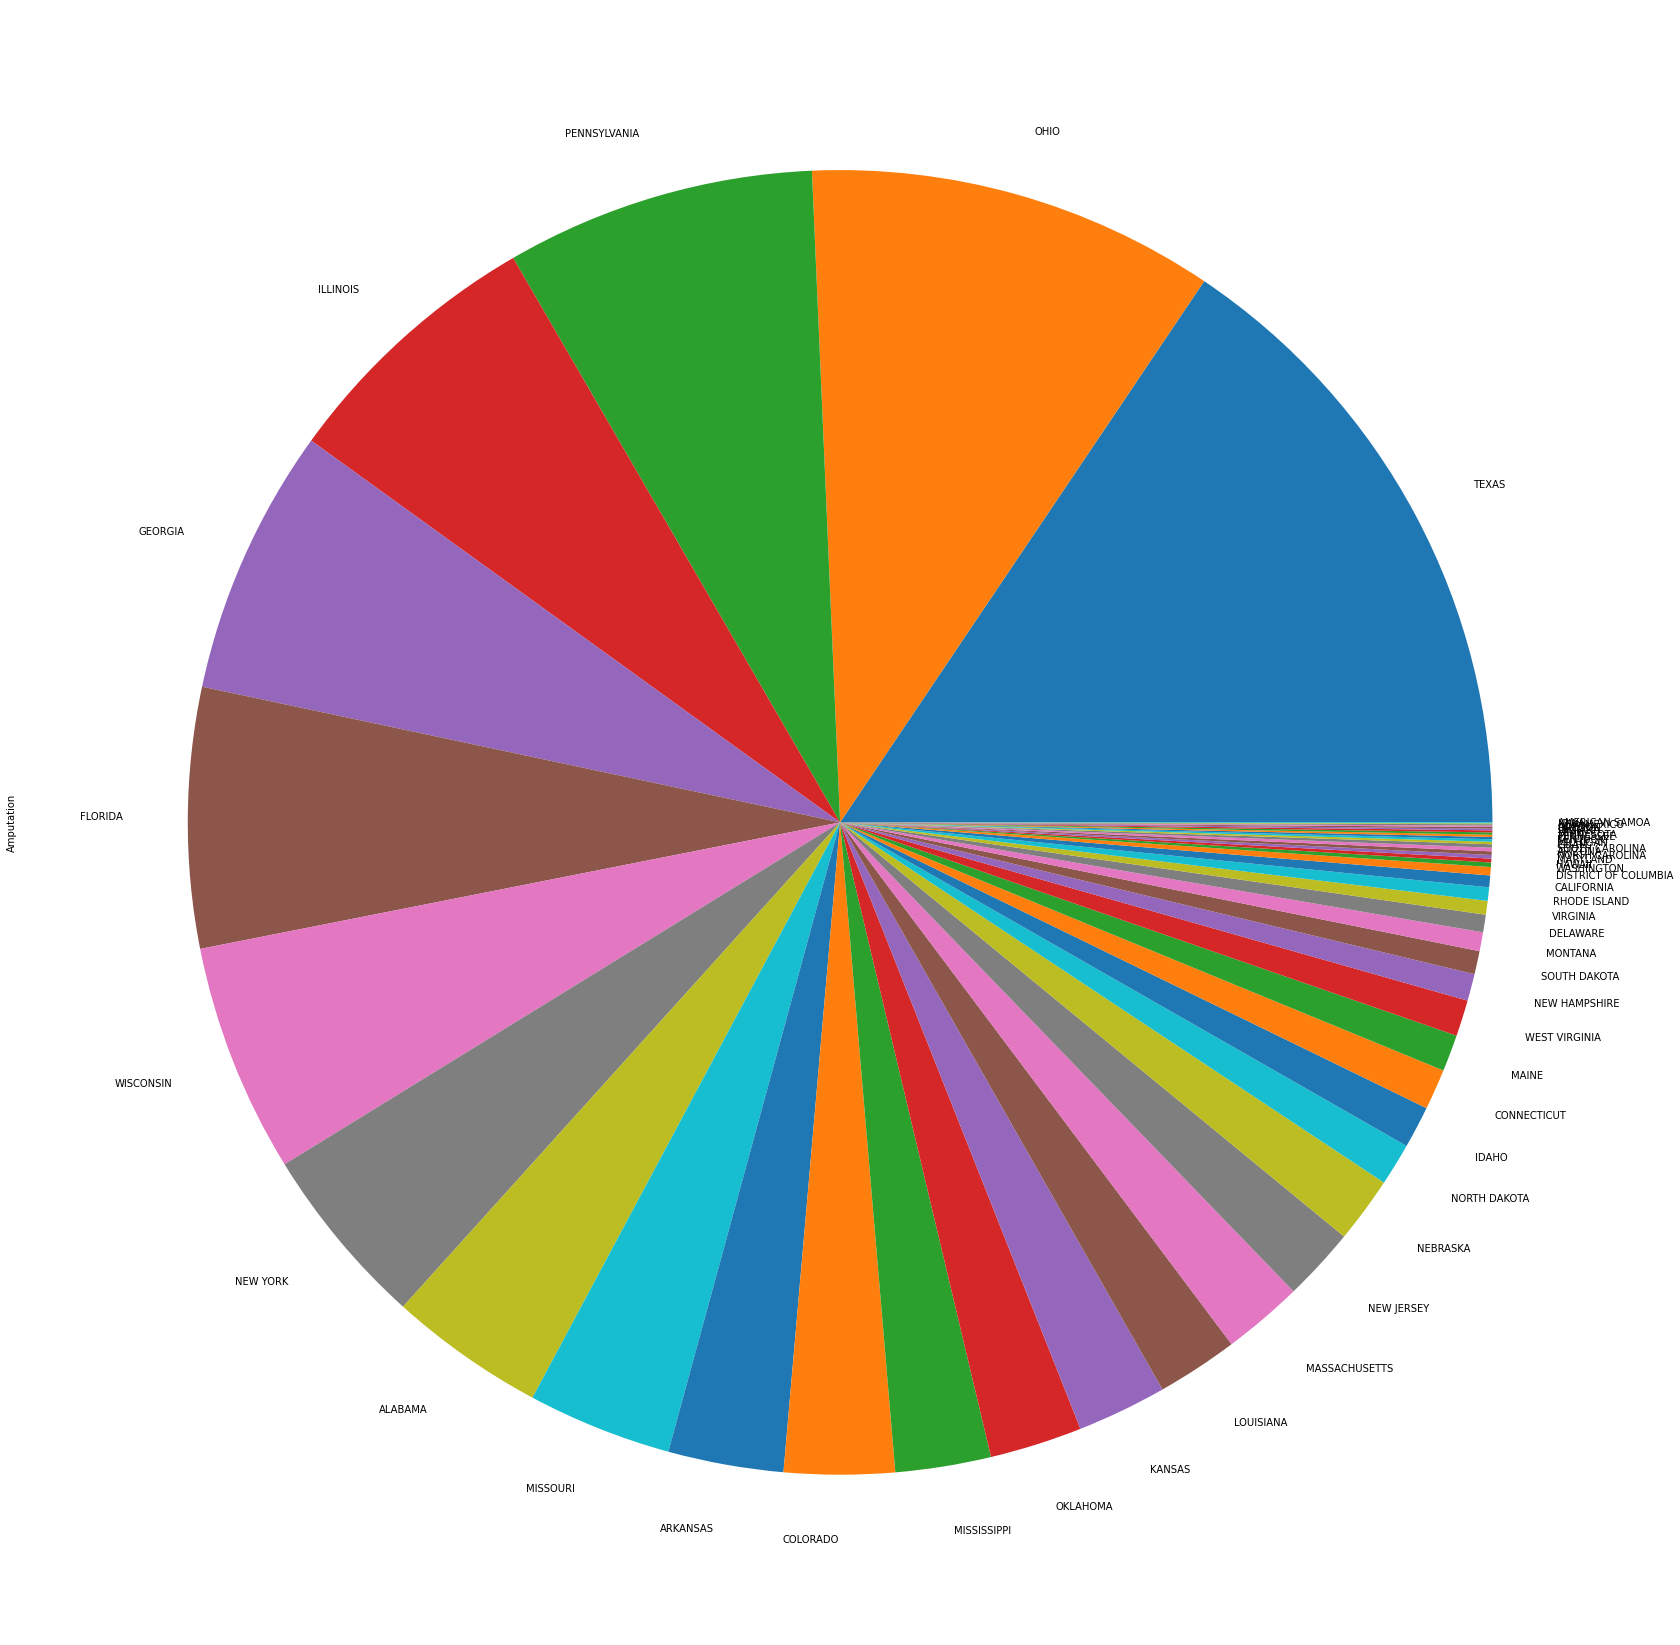

In [5]:

state_dict = {'AL': 'ALABAMA',
 'AK': 'ALASKA',
 'AS': 'AMERICAN SAMOA',
 'AZ': 'ARIZONA',
 'AR': 'ARKANSAS',
 'CA': 'CALIFORNIA',
 'CO': 'COLORADO',
 'CT': 'CONNECTICUT',
 'DE': 'DELAWARE',
 'DC': 'DISTRICT OF COLUMBIA',
 'FL': 'FLORIDA',
 'GA': 'GEORGIA',
 'GU': 'GUAM',
 'HI': 'HAWAII',
 'ID': 'IDAHO',
 'IL': 'ILLINOIS',
 'IN': 'INDIANA',
 'IA': 'IOWA',
 'KS': 'KANSAS',
 'KY': 'KENTUCKY',
 'LA': 'LOUISIANA',
 'ME': 'MAINE',
 'MD': 'MARYLAND',
 'MA': 'MASSACHUSETTS',
 'MI': 'MICHIGAN',
 'MN': 'MINNESOTA',
 'MS': 'MISSISSIPPI',
 'MO': 'MISSOURI',
 'MT': 'MONTANA',
 'NE': 'NEBRASKA',
 'NV': 'NEVADA',
 'NH': 'NEW HAMPSHIRE',
 'NJ': 'NEW JERSEY',
 'NM': 'NEW MEXICO',
 'NY': 'NEW YORK',
 'NC': 'NORTH CAROLINA',
 'ND': 'NORTH DAKOTA',
 'MP': 'NORTHERN MARIANA ISLANDS',
 'OH': 'OHIO',
 'OK': 'OKLAHOMA',
 'OR': 'OREGON',
 'PA': 'PENNSYLVANIA',
 'PR': 'PUERTO RICO',
 'RI': 'RHODE ISLAND',
 'SC': 'SOUTH CAROLINA',
 'SD': 'SOUTH DAKOTA',
 'TN': 'TENNESSEE',
 'TX': 'TEXAS',
 'VI': 'UNITED STATES VIRGIN ISLANDS',
 'UT': 'UTAH',
 'VT': 'VERMONT',
 'VA': 'VIRGINIA',
 'WA': 'WASHINGTON',
 'WV': 'WEST VIRGINIA',
 'WI': 'WISCONSIN',
 'WY': 'WYOMING'}


df['State'] = df['State'].apply(lambda x: state_dict[x] if x in state_dict.keys() else x)

amputations = df[['State','Amputation']].groupby(by='State').sum()

amputations.sort_values('Amputation',ascending=False)[:50].plot.pie(figsize=(30,30),subplots=True,legend=False)
amputations.sort_values('Amputation',ascending=False)[:50]

This plot shows the data on all states and shows which has the highest rate of work place amputation

I chose to make it thise way because it lets the eye see more easily then looking at a table of numbers how much more some states dominate the field of amputations then others do by showing the size they take up on the plot